In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

inf
nan


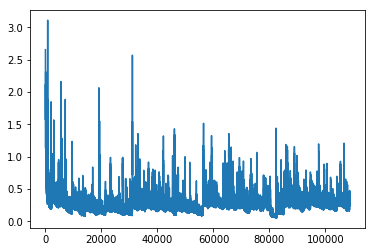

In [11]:
l='linabs_losses.csv'
df=pd.read_csv(l)
iters=df.num_iter
loss=df.loss_batch
#loss[loss==np.inf]=10
plt.figure()
plt.plot(iters, loss)
print(np.amax(loss))
print(loss[len(loss)-1])

39
39
0.15618227422237396
39
39
0.34776103496551514


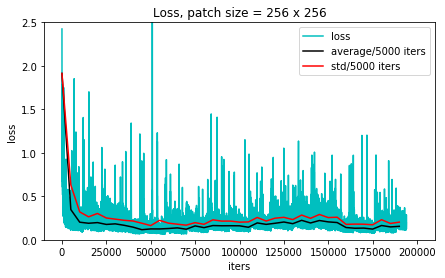

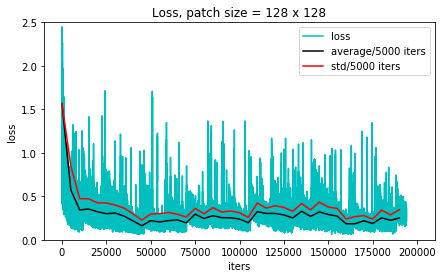

In [18]:
lossfiles=glob.glob('depth_losses/*.csv')
patch=['256 x 256', '128 x 128']
for f in lossfiles[:2]: 
    df=pd.read_csv(f)
    iters=df.num_iter
    loss=df.loss_batch
    loss_short=loss[:194000]
    iters_short=iters[:194000]
    #print(len(iters))
    step1=500
    step=5000
    movavg=[]
    movstd=[]
    movavg.append(loss[2])
    movstd.append(0)
    #print(len(iters)/step)
    for n in range(len(iters_short)/step):
        movavg.append(np.mean(loss_short[n*step:(n+1)*step]))
        movstd.append(np.std(loss_short[n*step:(n+1)*step]))

    if len(movavg)!= len(iters_short[::step]):
        movavg=movavg[:-1]
        #movstd=movstd[:-1]
    print(len(movstd))
    movstd=np.array(movstd)+np.array(movavg)
    
    print(len(movstd))
    
    plt.figure(figsize=(7, 4))
    plt.plot(iters_short, loss_short, label='loss', color='c')
    plt.plot(iters_short[::step], movavg, label='average/5000 iters', color='k')
    #plt.plot(iters_short[::step], movstd, label='std/5000 iters', color='r')
    plt.title( 'Loss, patch size = ' + patch[lossfiles.index(f)])
    plt.ylim(0, 2.5)
    plt.xlim(-10000, 210000)
    plt.xlabel('iters')
    plt.ylabel('loss')
    plt.legend()
    print(loss[len(loss)-1])

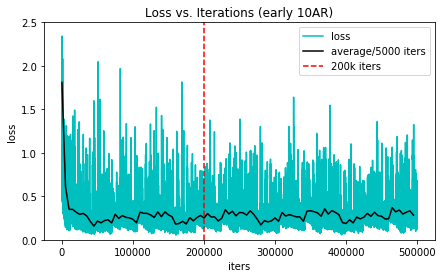

In [8]:
losses='misc_losses/losses_10ar_redo.csv'
df = pd.read_csv(losses)

iters=df.num_iter
loss=df.loss_batch
step=5000
movavg=[]
movavg.append(loss[2])
#print(len(iters)/step)
for n in range(len(iters)/step):
    movavg.append(np.mean(loss[n*step:(n+1)*step]))

if len(movavg)!= len(iters[::step]):
    movavg=movavg[:-1]
plt.figure(figsize=(7, 4))
plt.plot(iters, loss, label='loss', color='c')
plt.plot(iters[::step], movavg, label='average/5000 iters', color='k')
plt.axvline(x=200000, color='r', ls='--', label='200k iters')
plt.title( 'Loss vs. Iterations (early 10AR)')
plt.ylim(0, 2.5)
#plt.xlim(-10000, 210000)
plt.xlabel('iters')
plt.ylabel('loss')
plt.legend()

In [16]:
#losses='losses_190729.csv'
#losses='losses_10ar_redo.csv'
#losses='losses_10ar_fixed_aia_500k.csv'
losses='losses.csv'
#losses='losses_52linabslast_test.csv'
df = pd.read_csv(losses)

0.2634800970554352
0.05698470026254654


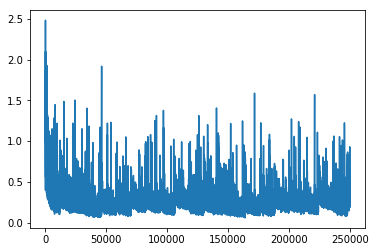

In [17]:
iters=df.num_iter
loss=df.loss_batch

plt.plot(iters, loss)
print(loss[len(loss)-1])
print(np.amin(loss))

(10500, 2)


ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

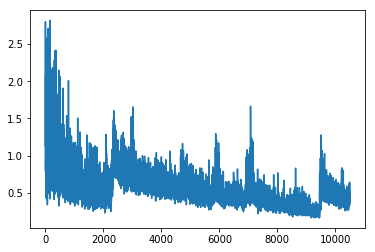

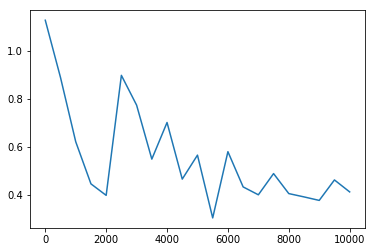

In [3]:
losses='misc_losses/losses_10ar_redo.csv'
df = pd.read_csv(losses)

iters=df.num_iter
loss=df.loss_batch

#print(loss[0])
step1=500
step=5000
movavg=[]
#movavg.append(loss[0])
#print(len(iters)/step)
for n in range(len(iters)/step - 1):
    movavg.append(np.mean(loss[n*step:(n+1)*step]))


#plt.figure(figsize=(20, 5))
plt.figure()
plt.plot(iters[0:len(iters):step1], loss[0:len(iters):step1], label='loss')
#plt.figure()
plt.plot(iters[0:len(iters)-step:step], movavg, label='avg. loss/5000 iters', color='k')
#plt.plot(range(len(movavg)), movavg, label='avg. loss/5000 iters')
plt.xlabel('Iters (x1000)')
plt.ylabel('Loss')
plt.axvline(x=500000, color='r', ls='--', label='500k iters')
plt.legend(loc='upper right')
plt.title('Training loss (early 10AR experiment)')
plt.ylim(0, 2)
print(loss)

In [46]:
#losses='losses_190729.csv'
#losses='losses_10ar_redo.csv'
#losses='losses_10ar_fixed_aia_500k.csv'
losses='losses_10ar_1mil.csv'
df = pd.read_csv(losses)

(1000000, 2)
0.4479746818542481


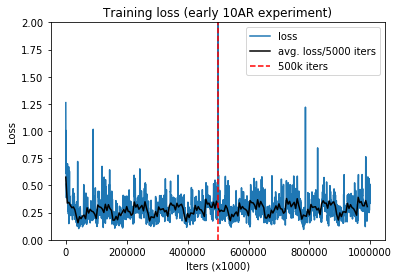

In [49]:
losses='misc_losses/losses_10ar_redo.csv'
df = pd.read_csv(losses)
iters=df.num_iter
loss=df.loss_batch

#print(loss[0])
step1=500
step=5000
movavg=[]
#movavg.append(loss[0])
#print(len(iters)/step)
for n in range(len(iters)/step - 1):
    movavg.append(np.mean(loss[n*step:(n+1)*step]))


#plt.figure(figsize=(20, 5))
plt.plot(iters[0:len(iters):step1], loss[0:len(iters):step1], label='loss')
#plt.figure()
plt.plot(iters[0:len(iters)-step:step], movavg, label='avg. loss/5000 iters', color='k')
#plt.plot(range(len(movavg)), movavg, label='avg. loss/5000 iters')
plt.xlabel('Iters (x1000)')
plt.ylabel('Loss')
plt.axvline(x=500000, color='r', ls='--', label='500k iters')
plt.legend(loc='upper right')
plt.title('Training loss (early 10AR experiment)')
plt.ylim(0, 2)
print(loss[499999])

well that's. absolutely nothing
how bout for a model we know doesn't suck that bad

Text(0.5,1,'Training loss (early 10AR experiment)')

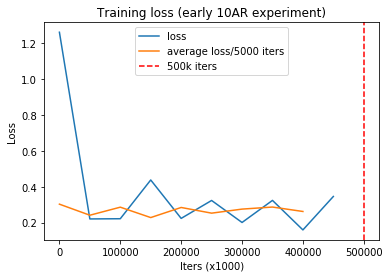

In [101]:
iters=df.num_iter
loss=df.loss_batch
#print(loss[0])
step=50000
movavg=[]
#print(len(iters)/step)
for n in range(len(iters)/step - 1):
    movavg.append(np.mean(loss[n*step:(n+1)*step]))

#print(len(movavg))
#plt.figure(figsize=(20, 5))
#plt.plot(iters, loss, label='loss')
#plt.figure()
plt.plot(iters[0:len(iters):step], loss[0:len(iters):step], label='loss')
plt.plot(iters[0:len(iters)-step:step], movavg, label='average loss/5000 iters')
plt.xlabel('Iters (x1000)')
plt.ylabel('Loss')
plt.axvline(x=500000, color='r', ls='--', label='500k iters')
plt.legend()
plt.title('Training loss (early 10AR experiment)')